In [1]:
import time
import random

def random_array(n, int_min, int_max):
    return [random.randint(int_min, int_max) for _ in range(n)]

def sorted_array_non_decreasing(n, int_min, int_max):
    arr = random_array(n, int_min, int_max)
    return sorted(arr)

def sorted_array_non_increasing(n, int_min, int_max):
    arr = random_array(n, int_min, int_max)
    return sorted(arr, reverse=True)

def almost_sorted_array(n, int_min, int_max):
    arr = sorted_array_non_decreasing(n, int_min, int_max)
    percentage_misplaced = 5
    m = int(n / 100.0 * percentage_misplaced / 2)
    for _ in range(m):
        x = random.randint(0, n - 1)
        y = random.randint(0, n - 1)
        arr[x], arr[y] = arr[y], arr[x]
    return arr

def array_with_many_duplicates(n, int_min, int_max):
    percentage_unique = 10
    m = int(n / 100.0 * percentage_unique)
    unique_values = random_array(m, int_min, int_max)
    arr = [unique_values[i % m] for i in range(n)]
    random.shuffle(arr)
    return arr

def array_with_only_one_unique(n, int_min, int_max):
    unique_value = random.randint(int_min, int_max)
    return [unique_value] * n


In [2]:
def partition(arr, low, high):
    # Randomly choose a pivot and swap it with the first element
    random_number_between_low_and_high = low + random.randint(0, high - low)
    arr[low], arr[random_number_between_low_and_high] = arr[random_number_between_low_and_high], arr[low]

    pivot = arr[low]
    i = low - 1
    j = high + 1

    while True:
        # Move i to the right as long as arr[i] is less than pivot
        while True:
            i += 1
            if arr[i] >= pivot:
                break

        # Move j to the left as long as arr[j] is greater than pivot
        while True:
            j -= 1
            if arr[j] <= pivot:
                break

        if i >= j:
            return j

        # Swap elements at i and j
        tmp = arr[i]
        arr[i] = arr[j]
        arr[j] = tmp

def quick_sort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quick_sort(arr, low, pi)
        quick_sort(arr, pi + 1, high)

def quicksort(arr):
    quick_sort(arr, 0, len(arr) - 1)
    return arr


In [3]:
def merge(arr, low, mid, high):
    helper = arr[:]  # Create a copy of the array for helper purposes
    l1, l2, i = low, mid + 1, low

    while l1 <= mid and l2 <= high:
        if helper[l1] <= helper[l2]:
            arr[i] = helper[l1]
            l1 += 1
        else:
            arr[i] = helper[l2]
            l2 += 1
        i += 1

    # Copy the remaining elements of the left half
    while l1 <= mid:
        arr[i] = helper[l1]
        l1 += 1
        i += 1

    # Copy the remaining elements of the right half
    while l2 <= high:
        arr[i] = helper[l2]
        l2 += 1
        i += 1

def merge_sort(arr, begin, end):
    if begin >= end:
        return

    mid = begin + (end - begin) // 2
    merge_sort(arr, begin, mid)
    merge_sort(arr, mid + 1, end)
    merge(arr, begin, mid, end)

def mergesort(arr):
    merge_sort(arr, 0, len(arr) - 1)
    return arr

In [4]:
def generate_times(arr, sort_function):
    start_time = time.time()
    sort_function(arr)
    return time.time() - start_time


int_min = -10**7
int_max = 10**7

test_cases = {
    "randomArray": random_array,
    "sortedArrayNonDecreasing": sorted_array_non_decreasing,
    "sortedArrayNonIncreasing": sorted_array_non_increasing,
    "almostSortedArray": almost_sorted_array,
    "arrayWithManyDuplicates": array_with_many_duplicates,
    "arrayWithOnlyOneUnique": array_with_only_one_unique,
}


In [5]:
qs_random_times = []
ms_random_times = []

qs_sorted_array_non_decreasing_times = []
ms_sorted_array_non_decreasing_times = []

qs_sorted_array_non_increasing_times = []
ms_sorted_array_non_increasing_times = []

qs_almost_sorted_array_times = []
ms_almost_sorted_array_times = []

qs_array_with_many_duplicates_times = []
ms_array_with_many_duplicates_times = []

qs_array_with_only_one_unique_times = []
ms_array_with_only_one_unique_times = []

In [6]:
sizes = [250, 500, 1000, 2500, 5000, 10000, 25000, 50000, 100000]

import time

for s in sizes:
    arr = random_array(s, int_min, int_max)
    
    a = time.time()
    arr1 = quicksort(arr)
    qs_random_times.append(time.time() - a)

    a = time.time()
    arr2 = mergesort(arr)
    ms_random_times.append(time.time() - a)
    
    assert arr1 == arr2

In [7]:
for s in sizes:
    arr = sorted_array_non_decreasing(s, int_min, int_max)
    
    a = time.time()
    arr1 =  quicksort(arr)
    qs_sorted_array_non_decreasing_times.append(time.time() - a)

    a = time.time()
    arr2 = mergesort(arr)
    ms_sorted_array_non_decreasing_times.append(time.time() - a)

    assert arr1 == arr2

In [8]:
for s in sizes:
    arr = sorted_array_non_increasing(s, int_min, int_max)
    
    a = time.time()
    arr1 = quicksort(arr)
    qs_sorted_array_non_increasing_times.append(time.time() - a)

    a = time.time()
    arr2 = mergesort(arr)
    ms_sorted_array_non_increasing_times.append(time.time() - a)

    assert arr1 == arr2

In [9]:


for s in sizes:
    arr = almost_sorted_array(s, int_min, int_max)
    
    a = time.time()
    arr1 = quicksort(arr)
    qs_almost_sorted_array_times.append(time.time() - a)

    a = time.time()
    arr2 = mergesort(arr)
    ms_almost_sorted_array_times.append(time.time() - a)

    assert arr1 == arr2

In [10]:


for s in sizes:
    arr = array_with_many_duplicates(s, int_min, int_max)
    
    a = time.time()
    arr1 = quicksort(arr)
    qs_array_with_many_duplicates_times.append(time.time() - a)

    a = time.time()
    arr2 = mergesort(arr)
    ms_array_with_many_duplicates_times.append(time.time() - a)

    assert arr1 == arr2

In [11]:


for s in sizes:
    arr = array_with_only_one_unique(s, int_min, int_max)
    
    a = time.time()
    arr1 = quicksort(arr)
    qs_array_with_only_one_unique_times.append(time.time() - a)

    a = time.time()
    arr2 = mergesort(arr)
    ms_array_with_only_one_unique_times.append(time.time() - a)

    assert arr1 == arr2

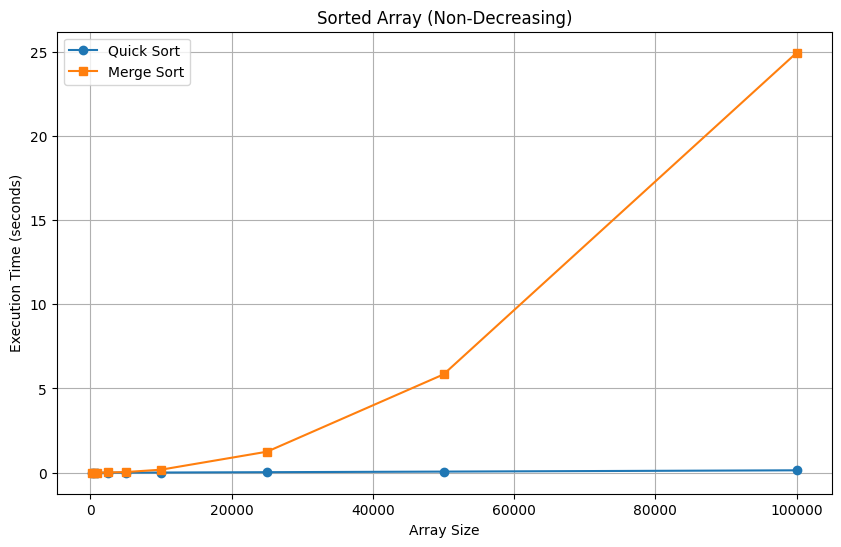

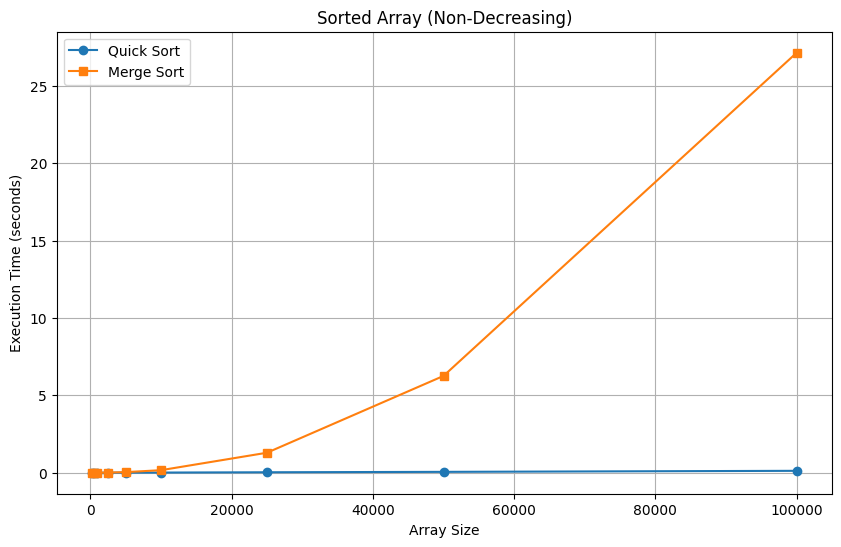

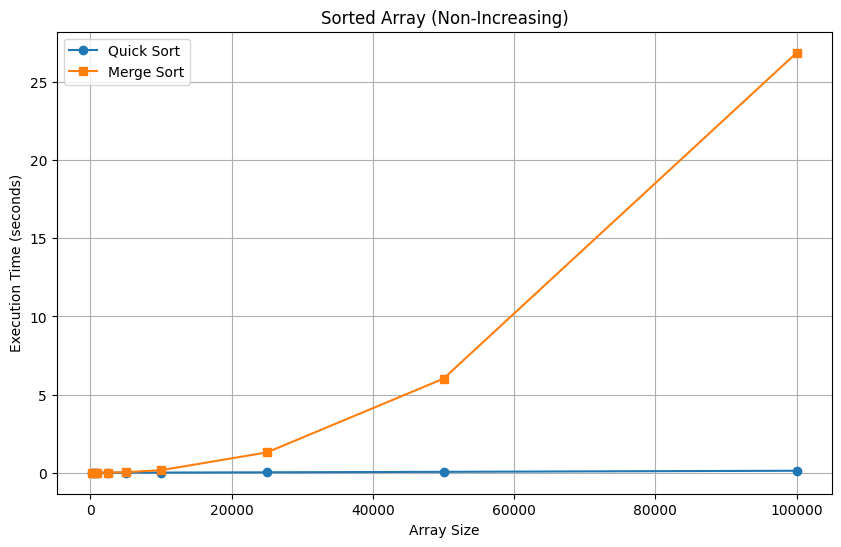

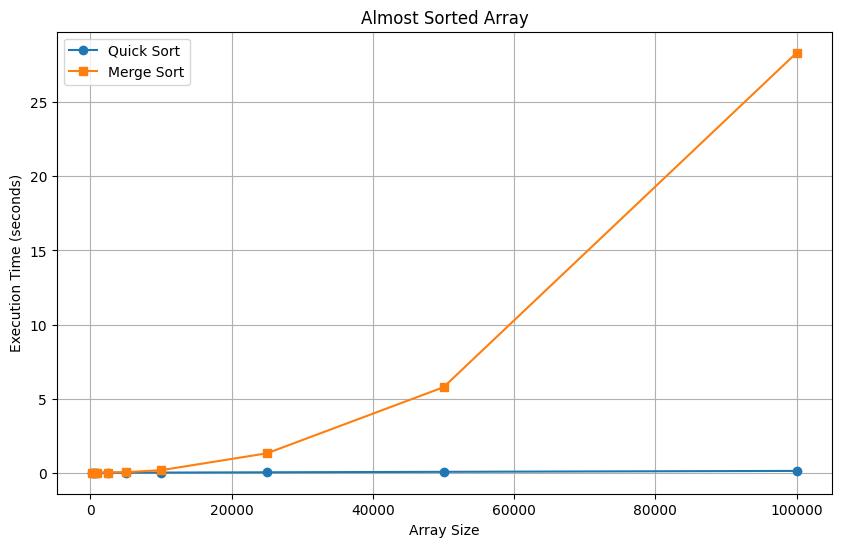

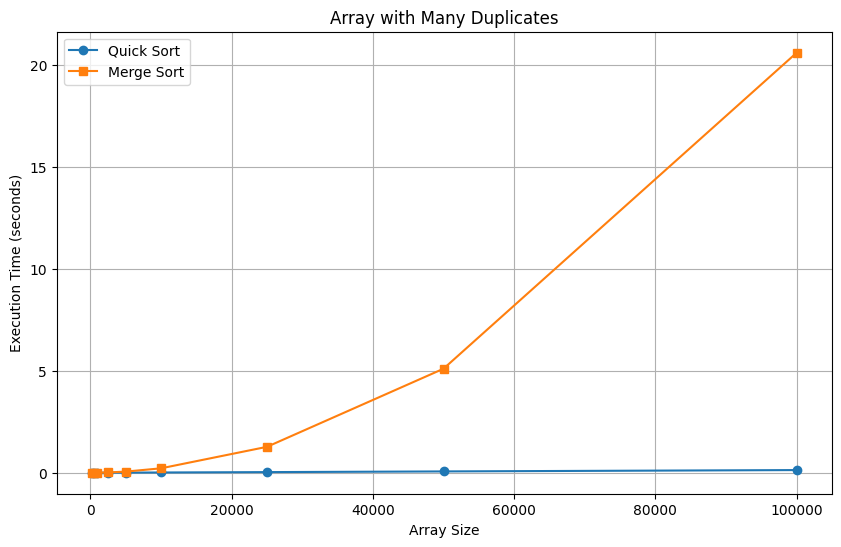

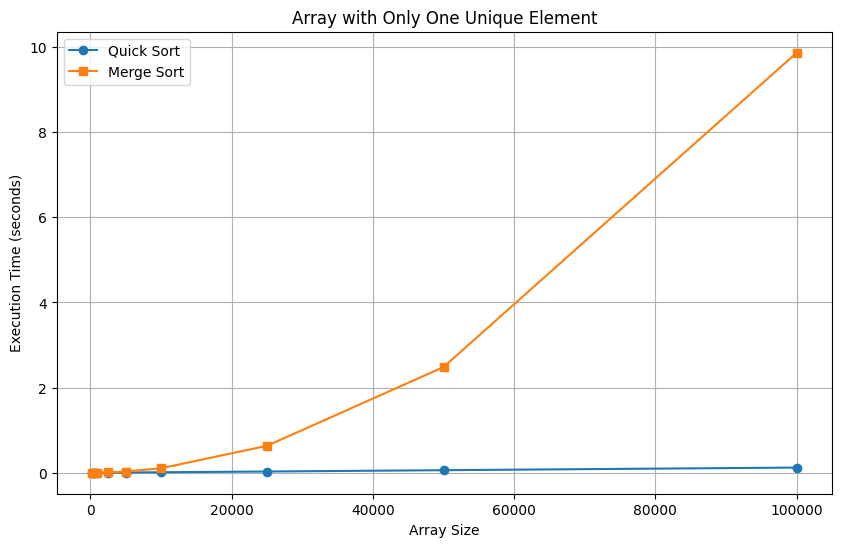

In [12]:
import matplotlib.pyplot as plt

# Plotting function
def plot_sort_times(sizes, quicksort_times, mergesort_times, title):
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, quicksort_times, label='Quick Sort', marker='o')
    plt.plot(sizes, mergesort_times, label='Merge Sort', marker='s')
    plt.xlabel('Array Size')
    plt.ylabel('Execution Time (seconds)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for each test case
plot_sort_times(sizes, qs_random_times, ms_random_times, "Sorted Array (Non-Decreasing)")
plot_sort_times(sizes, qs_sorted_array_non_decreasing_times, ms_sorted_array_non_decreasing_times, "Sorted Array (Non-Decreasing)")
plot_sort_times(sizes, qs_sorted_array_non_increasing_times, ms_sorted_array_non_increasing_times, "Sorted Array (Non-Increasing)")
plot_sort_times(sizes, qs_almost_sorted_array_times, ms_almost_sorted_array_times, "Almost Sorted Array")
plot_sort_times(sizes, qs_array_with_many_duplicates_times, ms_array_with_many_duplicates_times, "Array with Many Duplicates")
plot_sort_times(sizes, qs_array_with_only_one_unique_times, ms_array_with_only_one_unique_times, "Array with Only One Unique Element")
